In [ ]:
!pip install sqlalchemy==1.3.9
!pip install ibm_db_sa # adapter providing access to python/sqlalchemy interface to IBM users

In [ ]:
%load_ext sql

In [ ]:
# Remember the connection string is of the format:
# %sql ibm_db_sa://my-username:my-password@hostname:port/BLUDB?security=SSL
# Enter the connection string for your Db2 on Cloud database instance below
# i.e. copy after db2:// from the URI string in Service Credentials of your Db2 instance. Remove the double quotes at the end.
%sql ibm_db_sa://

In [ ]:
%sql ibm_db_sa://vxf23386:MQmhP5CvORhsF8Oa@0c77d6f2-5da9-48a9-81f8-86b520b87518.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:31198/BLUDB?security=SSL
# %sql ibm_db_sa://my-username:my-password@hostname:port/BLUDB?security=SSL

'Connected: vxf23386@BLUDB'

In [ ]:
import pandas as pd
chicago_data = pd.read_csv('https://data.cityofchicago.org/resource/jcxq-k9xf.csv')
%sql persist chicago_data

 * ibm_db_sa://vxf23386:***@0c77d6f2-5da9-48a9-81f8-86b520b87518.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:31198/BLUDB


'Persisted chicago_data'

In [ ]:
%sql select * from chicago_data limit 5;

 * ibm_db_sa://vxf23386:***@0c77d6f2-5da9-48a9-81f8-86b520b87518.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:31198/BLUDB
Done.


index,ca,community_area_name,percent_of_housing_crowded,percent_households_below_poverty,percent_aged_16_unemployed,percent_aged_25_without_high_school_diploma,percent_aged_under_18_or_over_64,per_capita_income_,hardship_index
0,1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
1,2.0,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0
2,3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0
3,4.0,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0
4,5.0,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0


In [ ]:
%sql select count(*) from chicago_data

 * ibm_db_sa://vxf23386:***@0c77d6f2-5da9-48a9-81f8-86b520b87518.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:31198/BLUDB
Done.


1
78


In [ ]:
%sql select count(*) from chicago_data where hardship_index>50.0

 * ibm_db_sa://vxf23386:***@0c77d6f2-5da9-48a9-81f8-86b520b87518.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:31198/BLUDB
Done.


1
38


In [ ]:
%sql select max(hardship_index) from chicago_data

 * ibm_db_sa://vxf23386:***@0c77d6f2-5da9-48a9-81f8-86b520b87518.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:31198/BLUDB
Done.


1
98.0


In [ ]:
%sql select ca, community_area_name from chicago_data where hardship_index = (select max(hardship_index) from chicago_data)

 * ibm_db_sa://vxf23386:***@0c77d6f2-5da9-48a9-81f8-86b520b87518.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:31198/BLUDB
Done.


ca,community_area_name
54.0,Riverdale


In [ ]:
%sql select ca, community_area_name from chicago_data order by hardship_index DESC NULLS LAST FETCH FIRST ROW ONLY;
# nulls last - place null vals last

 * ibm_db_sa://vxf23386:***@0c77d6f2-5da9-48a9-81f8-86b520b87518.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:31198/BLUDB
Done.


ca,community_area_name
54.0,Riverdale


In [ ]:
%%sql SELECT ca,community_area_name 
FROM chicago_data where hardship_index=98.0

 * ibm_db_sa://vxf23386:***@0c77d6f2-5da9-48a9-81f8-86b520b87518.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:31198/BLUDB
Done.


ca,community_area_name
54.0,Riverdale


In [ ]:
%%sql select ca, community_area_name 
from chicago_data where per_capita_income_ > 60000

 * ibm_db_sa://vxf23386:***@0c77d6f2-5da9-48a9-81f8-86b520b87518.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:31198/BLUDB
Done.


ca,community_area_name
6.0,Lake View
7.0,Lincoln Park
8.0,Near North Side
32.0,Loop


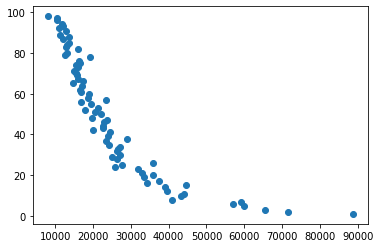

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.scatter(x = 'per_capita_income_', y = 'hardship_index', data = chicago_data)

(0.0, 102.85)

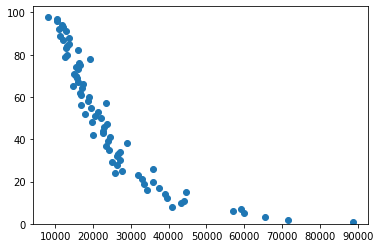

In [ ]:
plt.scatter(chicago_data['per_capita_income_'], chicago_data['hardship_index'])
plt.ylim(0, )

 * ibm_db_sa://vxf23386:***@0c77d6f2-5da9-48a9-81f8-86b520b87518.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:31198/BLUDB
Done.


(0.0, 102.85)

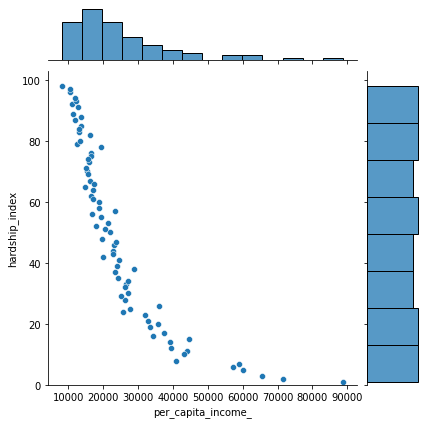

In [ ]:
income_and_hardship = %sql select per_capita_income_, hardship_index from chicago_data

plot = sns.jointplot(x = 'per_capita_income_', y = 'hardship_index', data = income_and_hardship.DataFrame())
plt.ylim(0,)

In [ ]:
!pip install sqlalchemy==1.3.9
!pip install ibm_db_sa

In [ ]:
%load_ext sql

In [ ]:
%sql ibm_db_sa://vxf23386:MQmhP5CvORhsF8Oa@0c77d6f2-5da9-48a9-81f8-86b520b87518.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:31198/BLUDB?security=SSL

'Connected: vxf23386@BLUDB'

In [ ]:
%sql select tabschema, tabname, create_time \
  from syscat.tables \
  where tabschema = 'vxf23386'

 * ibm_db_sa://vxf23386:***@0c77d6f2-5da9-48a9-81f8-86b520b87518.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:31198/BLUDB
Done.


tabschema,tabname,create_time


In [ ]:
%sql select TABSCHEMA, TABNAME, CREATE_TIME from SYSCAT.TABLES where TABSCHEMA='vxf23386'

 * ibm_db_sa://vxf23386:***@0c77d6f2-5da9-48a9-81f8-86b520b87518.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:31198/BLUDB
Done.


tabschema,tabname,create_time


In [ ]:
%sql select TABSCHEMA, TABNAME, CREATE_TIME from SYSCAT.TABLES \
      where TABSCHEMA not in ('SYSIBM', 'SYSCAT', 'SYSSTAT', 'SYSIBMADM', 'SYSTOOLS', 'SYSPUBLIC')

 * ibm_db_sa://vxf23386:***@0c77d6f2-5da9-48a9-81f8-86b520b87518.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:31198/BLUDB
Done.


tabschema,tabname,create_time
VXF23386,INSTRUCTOR,2021-08-03 14:53:57.703882
VXF23386,CHICAGO_DATA,2021-08-04 11:49:58.954227
VXF23386,SCHOOLS,2021-08-04 14:33:26.544789


In [ ]:
%sql select * from SYSCAT.TABLES where TABNAME = 'SCHOOLS'

 * ibm_db_sa://vxf23386:***@0c77d6f2-5da9-48a9-81f8-86b520b87518.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:31198/BLUDB
Done.


tabschema,tabname,owner,ownertype,TYPE,status,base_tabschema,base_tabname,rowtypeschema,rowtypename,create_time,alter_time,invalidate_time,stats_time,colcount,tableid,tbspaceid,card,npages,mpages,fpages,npartitions,nfiles,tablesize,overflow,tbspace,index_tbspace,long_tbspace,parents,children,selfrefs,keycolumns,keyindexid,keyunique,checkcount,datacapture,const_checked,pmap_id,partition_mode,log_attribute,pctfree,append_mode,REFRESH,refresh_time,LOCKSIZE,VOLATILE,row_format,property,statistics_profile,compression,rowcompmode,access_mode,clustered,active_blocks,droprule,maxfreespacesearch,avgcompressedrowsize,avgrowcompressionratio,avgrowsize,pctrowscompressed,logindexbuild,codepage,collationschema,collationname,collationschema_orderby,collationname_orderby,encoding_scheme,pctpagessaved,last_regen_time,secpolicyid,protectiongranularity,auditpolicyid,auditpolicyname,auditexceptionenabled,definer,oncommit,logged,onrollback,lastused,control,temporaltype,tableorg,extended_row_size,pctextendedrows,remarks
VXF23386,SCHOOLS,VXF23386,U,T,N,None,None,None,None,2021-08-04 14:33:26.544789,2021-08-04 14:33:26.544789,2021-08-04 14:33:26.544789,None,78,6,3625,-1,-1,-1,-1,-1,-1,-1,-1,VXF23386SPACE1,None,None,0,0,0,0,0,0,0,N,YYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYY,1,,0,-1,N,,None,R,,N,,None,N,,F,None,-1,N,999,-1,-1.0,-1,-1.0,None,1208,SYSIBM,IDENTITY,SYSIBM,IDENTITY,,-1,2021-08-04 14:33:26.544789,0,,None,None,N,VXF23386,,,,2021-08-04,,N,R,N,-1.0,None


In [ ]:
%sql select * from syscat.columns \
  where tabname = 'SCHOOLS'

 * ibm_db_sa://vxf23386:***@0c77d6f2-5da9-48a9-81f8-86b520b87518.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:31198/BLUDB
Done.


tabschema,tabname,colname,colno,typeschema,typename,length,scale,typestringunits,stringunitslength,DEFAULT,NULLS,codepage,collationschema,collationname,logged,compact,colcard,high2key,low2key,avgcollen,keyseq,partkeyseq,nquantiles,nmostfreq,numnulls,target_typeschema,target_typename,scope_tabschema,scope_tabname,source_tabschema,source_tabname,dl_features,special_props,hidden,inline_length,pctinlined,IDENTITY,rowchangetimestamp,GENERATED,text,compress,avgdistinctperpage,pagevarianceratio,sub_count,sub_delim_length,avgcollenchar,implicitvalue,seclabelname,rowbegin,rowend,transactionstartid,pctencoded,avgencodedcollen,qualifier,func_path,randdistkey,remarks
VXF23386,SCHOOLS,SCHOOL_ID,0,SYSIBM,INTEGER,4,0,None,None,None,Y,0,None,None,,,-1,    ,    ,-1,None,0,-1,-1,-1,None,None,None,None,None,None,None,None,,0,-1,N,N,,None,O,None,-1.0,-1,-1,-1,None,None,N,N,N,-1,-1.0,None,None,N,None
VXF23386,SCHOOLS,NAME_OF_SCHOOL,1,SYSIBM,VARCHAR,64,0,OCTETS,64,None,Y,1208,SYSIBM,IDENTITY,,,-1,                                 ,                                 ,-1,None,0,-1,-1,-1,None,None,None,None,None,None,None,None,,0,-1,N,N,,None,O,None,-1.0,-1,-1,-1,None,None,N,N,N,-1,-1.0,None,None,N,None
VXF23386,SCHOOLS,"Elementary, Middle, or High School",2,SYSIBM,VARCHAR,2,0,OCTETS,2,None,Y,1208,SYSIBM,IDENTITY,,,-1,  ,  ,-1,None,0,-1,-1,-1,None,None,None,None,None,None,None,None,,0,-1,N,N,,None,O,None,-1.0,-1,-1,-1,None,None,N,N,N,-1,-1.0,None,None,N,None
VXF23386,SCHOOLS,STREET_ADDRESS,3,SYSIBM,VARCHAR,29,0,OCTETS,29,None,Y,1208,SYSIBM,IDENTITY,,,-1,                             ,                             ,-1,None,0,-1,-1,-1,None,None,None,None,None,None,None,None,,0,-1,N,N,,None,O,None,-1.0,-1,-1,-1,None,None,N,N,N,-1,-1.0,None,None,N,None
VXF23386,SCHOOLS,CITY,4,SYSIBM,VARCHAR,7,0,OCTETS,7,None,Y,1208,SYSIBM,IDENTITY,,,-1,       ,       ,-1,None,0,-1,-1,-1,None,None,None,None,None,None,None,None,,0,-1,N,N,,None,O,None,-1.0,-1,-1,-1,None,None,N,N,N,-1,-1.0,None,None,N,None
VXF23386,SCHOOLS,STATE,5,SYSIBM,VARCHAR,2,0,OCTETS,2,None,Y,1208,SYSIBM,IDENTITY,,,-1,  ,  ,-1,None,0,-1,-1,-1,None,None,None,None,None,None,None,None,,0,-1,N,N,,None,O,None,-1.0,-1,-1,-1,None,None,N,N,N,-1,-1.0,None,None,N,None
VXF23386,SCHOOLS,ZIP_CODE,6,SYSIBM,INTEGER,4,0,None,None,None,Y,0,None,None,,,-1,    ,    ,-1,None,0,-1,-1,-1,None,None,None,None,None,None,None,None,,0,-1,N,N,,None,O,None,-1.0,-1,-1,-1,None,None,N,N,N,-1,-1.0,None,None,N,None
VXF23386,SCHOOLS,PHONE_NUMBER,7,SYSIBM,VARCHAR,14,0,OCTETS,14,None,Y,1208,SYSIBM,IDENTITY,,,-1,              ,              ,-1,None,0,-1,-1,-1,None,None,None,None,None,None,None,None,,0,-1,N,N,,None,O,None,-1.0,-1,-1,-1,None,None,N,N,N,-1,-1.0,None,None,N,None
VXF23386,SCHOOLS,LINK,8,SYSIBM,VARCHAR,78,0,OCTETS,78,None,Y,1208,SYSIBM,IDENTITY,,,-1,                                 ,                                 ,-1,None,0,-1,-1,-1,None,None,None,None,None,None,None,None,,0,-1,N,N,,None,O,None,-1.0,-1,-1,-1,None,None,N,N,N,-1,-1.0,None,None,N,None
VXF23386,SCHOOLS,NETWORK_MANAGER,9,SYSIBM,VARCHAR,40,0,OCTETS,40,None,Y,1208,SYSIBM,IDENTITY,,,-1,                                 ,                                 ,-1,None,0,-1,-1,-1,None,None,None,None,None,None,None,None,,0,-1,N,N,,None,O,None,-1.0,-1,-1,-1,None,None,N,N,N,-1,-1.0,None,None,N,None


In [ ]:
%sql select distinct(name), coltype, length \
      from sysibm.syscolumns \
      where tbname = 'SCHOOLS'

 * ibm_db_sa://vxf23386:***@0c77d6f2-5da9-48a9-81f8-86b520b87518.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:31198/BLUDB
Done.


name,coltype,length
10th Grade PLAN (2009),VARCHAR,4
10th Grade PLAN (2010),VARCHAR,4
11th Grade Average ACT (2011),VARCHAR,4
9th Grade EXPLORE (2009),VARCHAR,4
9th Grade EXPLORE (2010),VARCHAR,4
ADEQUATE_YEARLY_PROGRESS_MADE_,VARCHAR,3
AVERAGE_STUDENT_ATTENDANCE,VARCHAR,6
AVERAGE_TEACHER_ATTENDANCE,VARCHAR,6
CITY,VARCHAR,7
COLLABORATIVE_NAME,VARCHAR,34


In [ ]:
%sql select colname, typename, length from syscat.columns where tabname = 'SCHOOLS'

 * ibm_db_sa://vxf23386:***@0c77d6f2-5da9-48a9-81f8-86b520b87518.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:31198/BLUDB
Done.


colname,typename,length
SCHOOL_ID,INTEGER,4
NAME_OF_SCHOOL,VARCHAR,64
"Elementary, Middle, or High School",VARCHAR,2
STREET_ADDRESS,VARCHAR,29
CITY,VARCHAR,7
STATE,VARCHAR,2
ZIP_CODE,INTEGER,4
PHONE_NUMBER,VARCHAR,14
LINK,VARCHAR,78
NETWORK_MANAGER,VARCHAR,40


In [ ]:
%sql select count(distinct("NAME_OF_SCHOOL")) from SCHOOLS where "Elementary, Middle, or High School" = 'ES'

 * ibm_db_sa://vxf23386:***@0c77d6f2-5da9-48a9-81f8-86b520b87518.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:31198/BLUDB
Done.


1
462


In [ ]:
%sql select count(*) from SCHOOLS where "Elementary, Middle, or High School" = 'ES'

 * ibm_db_sa://vxf23386:***@0c77d6f2-5da9-48a9-81f8-86b520b87518.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:31198/BLUDB
Done.


1
462


In [ ]:
%sql select "NAME_OF_SCHOOL", "SAFETY_SCORE" from SCHOOLS \
          ORDER BY "SAFETY_SCORE" DESC \
          nulls last \
          LIMIT 5;

 * ibm_db_sa://vxf23386:***@0c77d6f2-5da9-48a9-81f8-86b520b87518.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:31198/BLUDB
Done.


name_of_school,safety_score
Abraham Lincoln Elementary School,99
Alexander Graham Bell Elementary School,99
Annie Keller Elementary Gifted Magnet School,99
Augustus H Burley Elementary School,99
Edgar Allan Poe Elementary Classical School,99


In [ ]:
%sql select max("SAFETY_SCORE") from SCHOOLS

 * ibm_db_sa://vxf23386:***@0c77d6f2-5da9-48a9-81f8-86b520b87518.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:31198/BLUDB
Done.


1
99


In [ ]:
%%sql 
select "NAME_OF_SCHOOL", "SAFETY_SCORE" from SCHOOLS 
where "SAFETY_SCORE" = (select max("SAFETY_SCORE") from SCHOOLS)

 * ibm_db_sa://vxf23386:***@0c77d6f2-5da9-48a9-81f8-86b520b87518.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:31198/BLUDB
Done.


name_of_school,safety_score
Abraham Lincoln Elementary School,99
Alexander Graham Bell Elementary School,99
Annie Keller Elementary Gifted Magnet School,99
Augustus H Burley Elementary School,99
Edgar Allan Poe Elementary Classical School,99
Edgebrook Elementary School,99
Ellen Mitchell Elementary School,99
James E McDade Elementary Classical School,99
James G Blaine Elementary School,99
LaSalle Elementary Language Academy,99


In [ ]:
%sql select "NAME_OF_SCHOOL", "SAFETY_SCORE" from SCHOOLS where \
"SAFETY_SCORE" = (select max("SAFETY_SCORE") from SCHOOLS)

 * ibm_db_sa://vxf23386:***@0c77d6f2-5da9-48a9-81f8-86b520b87518.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:31198/BLUDB
Done.


name_of_school,safety_score
Abraham Lincoln Elementary School,99
Alexander Graham Bell Elementary School,99
Annie Keller Elementary Gifted Magnet School,99
Augustus H Burley Elementary School,99
Edgar Allan Poe Elementary Classical School,99
Edgebrook Elementary School,99
Ellen Mitchell Elementary School,99
James E McDade Elementary Classical School,99
James G Blaine Elementary School,99
LaSalle Elementary Language Academy,99


In [ ]:
%sql select "NAME_OF_SCHOOL", "SAFETY_SCORE" from SCHOOLS \
where "SAFETY_SCORE" = (select max("SAFETY_SCORE") from SCHOOLS)

 * ibm_db_sa://vxf23386:***@0c77d6f2-5da9-48a9-81f8-86b520b87518.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:31198/BLUDB
Done.


name_of_school,safety_score
Abraham Lincoln Elementary School,99
Alexander Graham Bell Elementary School,99
Annie Keller Elementary Gifted Magnet School,99
Augustus H Burley Elementary School,99
Edgar Allan Poe Elementary Classical School,99
Edgebrook Elementary School,99
Ellen Mitchell Elementary School,99
James E McDade Elementary Classical School,99
James G Blaine Elementary School,99
LaSalle Elementary Language Academy,99


In [ ]:
%%sql 
select NAME_OF_SCHOOL, Average_Student_Attendance FROM SCHOOLS 
order by "AVERAGE_STUDENT_ATTENDANCE" DESC 
nulls last 
limit 10

 * ibm_db_sa://vxf23386:***@0c77d6f2-5da9-48a9-81f8-86b520b87518.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:31198/BLUDB
Done.


name_of_school,average_student_attendance
John Charles Haines Elementary School,98.40%
James Ward Elementary School,97.80%
Edgar Allan Poe Elementary Classical School,97.60%
Orozco Fine Arts & Sciences Elementary School,97.60%
Rachel Carson Elementary School,97.60%
Annie Keller Elementary Gifted Magnet School,97.50%
Andrew Jackson Elementary Language Academy,97.40%
Lenart Elementary Regional Gifted Center,97.40%
Disney II Magnet School,97.30%
John H Vanderpoel Elementary Magnet School,97.20%


In [ ]:
%%sql
select NAME_OF_SCHOOL, Average_Student_Attendance FROM SCHOOLS
order by "AVERAGE_STUDENT_ATTENDANCE"
limit 5;

 * ibm_db_sa://vxf23386:***@0c77d6f2-5da9-48a9-81f8-86b520b87518.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:31198/BLUDB
Done.


name_of_school,average_student_attendance
Richard T Crane Technical Preparatory High School,57.90%
Barbara Vick Early Childhood & Family Center,60.90%
Dyett High School,62.50%
Wendell Phillips Academy High School,63.00%
Orr Academy High School,66.30%


In [ ]:
%%sql
select NAME_OF_SCHOOL, Average_Student_Attendance FROM SCHOOLS
order by "AVERAGE_STUDENT_ATTENDANCE"
fetch first 5 rows only;

 * ibm_db_sa://vxf23386:***@0c77d6f2-5da9-48a9-81f8-86b520b87518.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:31198/BLUDB
Done.


name_of_school,average_student_attendance
Richard T Crane Technical Preparatory High School,57.90%
Barbara Vick Early Childhood & Family Center,60.90%
Dyett High School,62.50%
Wendell Phillips Academy High School,63.00%
Orr Academy High School,66.30%


In [ ]:
%%sql
select NAME_OF_SCHOOL, replace(Average_Student_Attendance, '%', '') FROM SCHOOLS
order by "AVERAGE_STUDENT_ATTENDANCE"
fetch first 5 rows only;

 * ibm_db_sa://vxf23386:***@0c77d6f2-5da9-48a9-81f8-86b520b87518.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:31198/BLUDB
Done.


name_of_school,2
Richard T Crane Technical Preparatory High School,57.90
Barbara Vick Early Childhood & Family Center,60.90
Dyett High School,62.50
Wendell Phillips Academy High School,63.00
Orr Academy High School,66.30


In [ ]:
%%sql
select name_of_school, average_student_attendance from SCHOOLS
where replace(average_student_attendance, '%', '') < 70

 * ibm_db_sa://vxf23386:***@0c77d6f2-5da9-48a9-81f8-86b520b87518.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:31198/BLUDB
Done.


name_of_school,average_student_attendance
Barbara Vick Early Childhood & Family Center,60.90%
Chicago Vocational Career Academy High School,68.80%
Dyett High School,62.50%
Manley Career Academy High School,66.80%
Orr Academy High School,66.30%
Richard T Crane Technical Preparatory High School,57.90%
Roberto Clemente Community Academy High School,69.60%
Wendell Phillips Academy High School,63.00%


In [ ]:
%sql SELECT Name_of_School, Average_Student_Attendance  \
     from SCHOOLS \
     where CAST ( REPLACE(Average_Student_Attendance, '%', '') AS DOUBLE ) < 70 \
     order by Average_Student_Attendance

 * ibm_db_sa://vxf23386:***@0c77d6f2-5da9-48a9-81f8-86b520b87518.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:31198/BLUDB
Done.


name_of_school,average_student_attendance
Richard T Crane Technical Preparatory High School,57.90%
Barbara Vick Early Childhood & Family Center,60.90%
Dyett High School,62.50%
Wendell Phillips Academy High School,63.00%
Orr Academy High School,66.30%
Manley Career Academy High School,66.80%
Chicago Vocational Career Academy High School,68.80%
Roberto Clemente Community Academy High School,69.60%


In [ ]:
%sql SELECT Name_of_School, Average_Student_Attendance  \
     from SCHOOLS \
     where DECIMAL ( REPLACE(Average_Student_Attendance, '%', '') ) < 70 \
     order by Average_Student_Attendance

 * ibm_db_sa://vxf23386:***@0c77d6f2-5da9-48a9-81f8-86b520b87518.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:31198/BLUDB
Done.


name_of_school,average_student_attendance
Richard T Crane Technical Preparatory High School,57.90%
Barbara Vick Early Childhood & Family Center,60.90%
Dyett High School,62.50%
Wendell Phillips Academy High School,63.00%
Orr Academy High School,66.30%
Manley Career Academy High School,66.80%
Chicago Vocational Career Academy High School,68.80%
Roberto Clemente Community Academy High School,69.60%


In [ ]:
%%sql
select "COMMUNITY_AREA_NAME", sum("COLLEGE_ENROLLMENT") as SUM_ENROLLMENTS
from SCHOOLS
group by "COMMUNITY_AREA_NAME"
limit 5

 * ibm_db_sa://vxf23386:***@0c77d6f2-5da9-48a9-81f8-86b520b87518.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:31198/BLUDB
Done.


community_area_name,sum_enrollments
ALBANY PARK,6864
ARCHER HEIGHTS,4823
ARMOUR SQUARE,1458
ASHBURN,6483
AUBURN GRESHAM,4175


In [ ]:
%%sql
select "COMMUNITY_AREA_NAME", sum("COLLEGE_ENROLLMENT") as SUM_ENROLLMENTS
from SCHOOLS
group by "COMMUNITY_AREA_NAME"
order by SUM_ENROLLMENTS
limit 5

 * ibm_db_sa://vxf23386:***@0c77d6f2-5da9-48a9-81f8-86b520b87518.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:31198/BLUDB
Done.


community_area_name,sum_enrollments
OAKLAND,140
FULLER PARK,531
BURNSIDE,549
OHARE,786
LOOP,871


In [ ]:
%%sql
select "COMMUNITY_AREA_NAME", sum("COLLEGE_ENROLLMENT") as SUM_ENROLLMENTS
from SCHOOLS
group by "COMMUNITY_AREA_NAME"
order by (select sum("COLLEGE_ENROLLMENT") from SCHOOLS)
limit 5

 * ibm_db_sa://vxf23386:***@0c77d6f2-5da9-48a9-81f8-86b520b87518.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:31198/BLUDB
Done.


community_area_name,sum_enrollments
ALBANY PARK,6864
ARCHER HEIGHTS,4823
ARMOUR SQUARE,1458
ASHBURN,6483
AUBURN GRESHAM,4175


In [ ]:
%%sql
select NAME_OF_SCHOOL, SAFETY_SCORE from SCHOOLS
order by SAFETY_SCORE
fetch first 5 rows only

 * ibm_db_sa://vxf23386:***@0c77d6f2-5da9-48a9-81f8-86b520b87518.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:31198/BLUDB
Done.


name_of_school,safety_score
Edmond Burke Elementary School,1
Luke O'Toole Elementary School,5
George W Tilton Elementary School,6
Foster Park Elementary School,11
Emil G Hirsch Metropolitan High School,13


In [ ]:
%%sql
select community_area_name, hardship_index
from SCHOOLS
group by community_area_name
where sum_enrollments = 4368;

 * ibm_db_sa://vxf23386:***@0c77d6f2-5da9-48a9-81f8-86b520b87518.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:31198/BLUDB
(ibm_db_dbi.ProgrammingError) ibm_db_dbi::ProgrammingError: SQLNumResultCols failed: [IBM][CLI Driver][DB2/LINUXX8664] SQL0104N  An unexpected token "where" was found following "community_area_name".  Expected tokens may include:  "NPS_DOUBLE_DOT".  SQLSTATE=42601 SQLCODE=-104
[SQL: select community_area_name, hardship_index
from SCHOOLS
group by community_area_name
where sum_enrollments = 4368;]
(Background on this error at: http://sqlalche.me/e/f405)


In [ ]:
%%sql
select schools.community_area_name, hardship_index
from chicago_data, schools
where chicago_data.ca = schools.community_area_number
  and college_enrollment = 4368

 * ibm_db_sa://vxf23386:***@0c77d6f2-5da9-48a9-81f8-86b520b87518.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:31198/BLUDB
Done.


community_area_name,hardship_index
NORTH CENTER,6.0


In [ ]:
%%sql
select community_area_name, hardship_index
from chicago_data
where ca =
(select community_area_number from schools order by college_enrollment DESC limit 1);

 * ibm_db_sa://vxf23386:***@0c77d6f2-5da9-48a9-81f8-86b520b87518.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:31198/BLUDB
Done.


community_area_name,hardship_index
North Center,6.0


In [ ]:
%sql select community_area_number from schools order by college_enrollment DESC limit 1

 * ibm_db_sa://vxf23386:***@0c77d6f2-5da9-48a9-81f8-86b520b87518.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:31198/BLUDB
Done.


community_area_number
5


In [ ]:
%%sql select ca, community_area_name, hardship_index from chicago_data
where ca in
   ( select community_area_number from schools order by college_enrollment desc limit 1 )

 * ibm_db_sa://vxf23386:***@0c77d6f2-5da9-48a9-81f8-86b520b87518.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:31198/BLUDB
Done.


ca,community_area_name,hardship_index
5.0,North Center,6.0


In [ ]:
%%sql
select community_area_name, hardship_index
from chicago_data
where ca in 5;

 * ibm_db_sa://vxf23386:***@0c77d6f2-5da9-48a9-81f8-86b520b87518.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:31198/BLUDB
Done.


community_area_name,hardship_index
North Center,6.0


In [ ]:
%sql select min(college_enrollment) from schools

 * ibm_db_sa://vxf23386:***@0c77d6f2-5da9-48a9-81f8-86b520b87518.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:31198/BLUDB
Done.


1
21
